<a href="https://colab.research.google.com/github/AntoniaSch/Facial-Keypoints-Detector/blob/master/Facial_Keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading and exploring the data

In [0]:
train = pd.read_csv('/content/training.csv')  
test = pd.read_csv('/content/test.csv')

As we can see in the following our datasets contains values for x and y axis of various keypoints in a face. The last column contains the values of each pixel from the actual face image.

In [5]:
train.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [6]:
train.drop('Image', axis = 1).head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


When looking for **missing values** we encountered some in three columns of the dataset:

In [7]:
train.isnull().any().value_counts()

True     28
False     3
dtype: int64

For Image data the **ffill-method** is quite common as it is filling it with the value in the Forward index or Previous/Back respectively.

In [0]:
train.fillna(method = 'ffill',inplace = True)

# Get Image - Data
Let's get now one of the 7049 images in our dataset printed! First of all we need to understand the size of the image and 9216 is indicating a 96x96 image.

In [90]:
images = []
for i in range(0,7049):
    image = train['Image'][i].split(' ')
    images.append(image)
images = np.array(images,dtype = 'float')
images.shape

(7049, 9216)

So we need to reshape the images to proceed to have 7049 samples with 96 x and 96 y values 

In [92]:
X_train = images.reshape(7049,96,96,1) 
X_train.shape

(7049, 96, 96, 1)

# Get Label - Data
The keypoints are stored in the following Dataframe showing we have 7049 faces with 15 keypoints each and the two corresponding values for x and y axis.

In [12]:
keypoints = train.drop(['Image'], axis=1)
keypoints.shape

(7049, 30)

For example the first image has the following values for the x - coordinate of each keypoint:

In [14]:
keypoints.iloc[0,0::2]

left_eye_center_x            66.033564
right_eye_center_x           30.227008
left_eye_inner_corner_x      59.582075
left_eye_outer_corner_x      73.130346
right_eye_inner_corner_x     36.356571
right_eye_outer_corner_x     23.452872
left_eyebrow_inner_end_x     56.953263
left_eyebrow_outer_end_x     80.227128
right_eyebrow_inner_end_x    40.227609
right_eyebrow_outer_end_x    16.356379
nose_tip_x                   44.420571
mouth_left_corner_x          61.195308
mouth_right_corner_x         28.614496
mouth_center_top_lip_x       43.312602
mouth_center_bottom_lip_x    43.130707
Name: 0, dtype: float64

In [0]:
x = keypoints.iloc[0,0::2].values
y = keypoints.iloc[0,1::2].values

Using matplotlibs function *imshow* we get the image in a gray-scale. Each value of the pixel indicated the color-value. Lets add the relevant keypoints with red dots too:

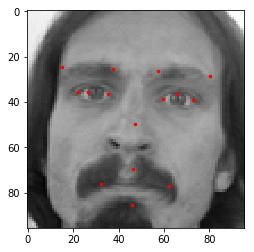

In [96]:
plt.imshow(X_train[0].reshape(96,96), cmap ='gray')
plt.scatter(x, y, c='red',s = 6);

Just like with the image (X_train) we need to get y_train too:

In [0]:
y_train = []
for i in range(0,7049):
    y = keypoints.iloc[i,:]
    y_train.append(y)
    
y_train = np.array(y_train,dtype = 'float')

A common practice when working with image data is as well rescaling the values:
Our images consist in RGB coefficients in the 0-255, but such values are quite high for our models to process, so we divide the values by 255 to get resulting values from 0 to 1. 

In [0]:
# Rescale
X_train = X_train/255
X_train[1]

# Building the Neural Net

Just a quick reminder: A neural net consists of an input, some hidden layers and one output layer. Every layer contains several nodes or units that are linked to the previous or next layer by using weights. 
In the following we are going to use Keras to build the Neural Network. We are using a Sequential model which implies the layers are stacked linearly:


In [0]:
from keras.models import Sequential
model = Sequential()

Now lets add some layers to our model!
When working with image data the **Convolutional Neural Network** is a good way to tackle the problem. In contrast to others it is able to preserve the spatial relationship between pixels by small squares of input data. This is done by having a small window hovering over the entire image like this:

https://cdn-images-1.medium.com/max/800/0*KdJv2eWBC1qUs3Po

Instead of using the entire 96x96 image we use a 3x3 window to learn the image features. 

In [0]:
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
model.add(Conv2D(filters = 48, kernel_size = (3,3), input_shape = (96,96,1), activation = 'relu'))

Next we are adding a MaxPooling layer

*Pooling (also called subsampling or downsampling) reduces the dimensionality of each feature map but retains the most important information. In case of Max Pooling, we define a spatial neighborhood (for example, a 2×2 window) and take the largest element from the rectified feature map within that window. Instead of taking the largest element we could also take the average (Average Pooling) or sum of all elements in that window.*

In [0]:
model.add(MaxPool2D(2,2))

 *After pooling comes flattening. Here the matrix is converted into a linear array so that to input it into the nodes of our neural network.*

In [0]:
model.add(Flatten())

Last but not least we define our output layer: As we have 15 keypoints and 2 axis our output layer needs to have 30 units. Dense layers are the regular or core layers of neurons in a neural net meaning every unit recieves input from all the neurons in the previous layer (=densely connected).

In [75]:
model.add(Dense(30, activation= 'relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 94, 94, 48)        480       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 48)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 106032)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                3180990   
Total params: 3,181,470
Trainable params: 3,181,470
Non-trainable params: 0
_________________________________________________________________


Before fitting the model to our train data we need to compile it. This contains three components:
1. Optimizer used
2. Loss-Function of the model: MSE which we are trying to minimize
3. Metrics to evaluate the performance of the model.

In [0]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['acc'])

To speed up the process and prevent overfitting we add the Early Stopping function: If the validation accuracy does not improve in 10 epochs, we are going to stop training the model.

In [0]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=10)

In [78]:
epoch = 200
develop= model.fit(X_train,y_train,epochs = epoch,batch_size = 128, validation_split = 0.2, verbose = 2, callbacks = [early_stopping] )
develop

Train on 5639 samples, validate on 1410 samples
Epoch 1/200
 - 65s - loss: 855.2065 - acc: 0.1968 - val_loss: 501.4704 - val_acc: 0.3121
Epoch 2/200
 - 65s - loss: 467.1021 - acc: 0.3701 - val_loss: 411.2509 - val_acc: 0.3121
Epoch 3/200
 - 65s - loss: 263.6097 - acc: 0.4804 - val_loss: 232.1107 - val_acc: 0.5142
Epoch 4/200
 - 65s - loss: 240.7686 - acc: 0.5723 - val_loss: 230.4893 - val_acc: 0.6043
Epoch 5/200
 - 64s - loss: 239.0517 - acc: 0.6253 - val_loss: 233.3942 - val_acc: 0.6901
Epoch 6/200
 - 64s - loss: 238.2639 - acc: 0.6535 - val_loss: 227.9816 - val_acc: 0.6936
Epoch 7/200
 - 65s - loss: 237.0947 - acc: 0.6999 - val_loss: 228.6978 - val_acc: 0.7021
Epoch 8/200
 - 65s - loss: 236.7033 - acc: 0.7193 - val_loss: 227.0862 - val_acc: 0.7113
Epoch 9/200
 - 64s - loss: 236.5879 - acc: 0.7210 - val_loss: 226.6082 - val_acc: 0.7078
Epoch 10/200
 - 65s - loss: 235.7967 - acc: 0.7455 - val_loss: 227.0767 - val_acc: 0.7206
Epoch 11/200
 - 65s - loss: 235.4984 - acc: 0.7352 - val_loss

KeyboardInterrupt: ignored

In general our model has an accuracy of:

In [67]:
train_loss, train_acc = model.evaluate(X_train,y_train)
train_acc

7049/7049 [==============================] - 30s 4ms/step


0.7809618385755723

The history of the model is stored within the develop.history - but as this is not very easy to compare, let's make some graphs out of it:

In [61]:
# Variable catching the number of epochs
epoch_len = max(develop.epoch)+2
epoch_len

8

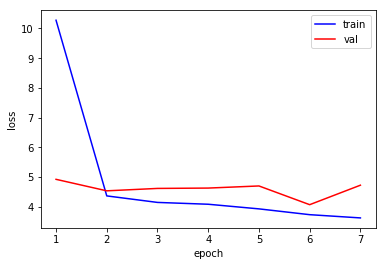

In [62]:
loss=develop.history['loss']
val_loss=develop.history['val_loss']
y=np.arange(1,(epoch_len))
plt.plot(y,loss,'b',label='train')
plt.plot(y,val_loss,'r',label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

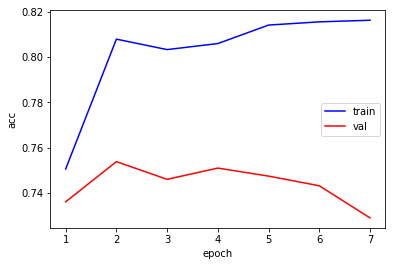

In [63]:
acc=develop.history['acc']
val_acc=develop.history['val_acc']
y=np.arange(1,(epoch_len))
plt.plot(y,acc,'b',label='train')
plt.plot(y,val_acc,'r',label='val')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend();

In [0]:
model.save('FacialKeypoints.h5')

#Predicting 

In [54]:
test.head()
test.shape

(1783, 2)

In [48]:
images = []
for i in range(0,1783):
    image = test['Image'][i].split(' ')
    images.append(image)
    
images = np.array(images,dtype = 'float')
X_test = images.reshape(-1,96,96,1)
X_test.shape

(1783, 96, 96, 1)

In [0]:
predictions = model.predict(X_test/255)

In [0]:
predictions = pd.DataFrame(predictions)

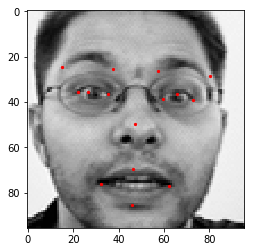

In [66]:
x = predictions.iloc[0,0::2].values
y = predictions.iloc[0,1::2].values

plt.imshow(X_test[0].reshape(96,96), cmap ='gray')
plt.scatter(x, y, c='red',s = 5);

In [0]:
model.save('FacialKeypoints.h5')

In [0]:
from keras.models import load_model
model = load_model('FacialKeypoints.h5')

# Outlook

We could try to build a more sophisticated Neural Net, but this notebook aimed to get a general understanding rather than achieving the highest accuracy. Nonetheless, here are some ideas on how to improve the performance:
To Do:
* Increasing or decreasing the number of new convolutional layers you add.
* Increasing or decreasing the number of nodes in each new convolutional layer.
* Tuning hyper-parameters like activation functions and learning rates.
* Experimenting with the image preprocessing you apply.
* Unfreezing the fully-connected layer and adjusting/training that as well.
* Unfreezing one or more preexisting convolutional layers and (re-)training those as well. 
